In [1]:
import requests

# Send a GET request to the desired API URL
response = requests.get('https://api.hearthstonejson.com/v1/190920/frFR/cards.collectible.json')

# Parse the response and print it
data = response.json()
#print(data)
type(data)

list

In [18]:
def findLegendaire(data) :
    compteur =0
    for card in data :
        if card["rarity"] == 'LEGENDARY':
            compteur+= 1
    return compteur

def findEpic(data) :
    compteur =0
    for card in data :
        if card["rarity"] == 'EPIC':
            compteur+= 1
    return compteur

def findRare(data) :
    compteur =0
    for card in data :
        if card["rarity"] == 'RARE':      
            compteur+= 1
    return compteur


def findCommon(data) :
    compteur =0
    for card in data :
        if card["rarity"] == 'COMMON':
            compteur+= 1
    return compteur

def findFree(data) :
    compteur =0
    for card in data :
        if card["rarity"] == 'FREE':
            compteur+= 1
    return compteur



def dataSetInfo(data):
    long = len(data)
    print("il y a ",long," cartes au total")
    print(findLegendaire(data)," légendaire sois ",(findLegendaire(data)/long)*100, "% du dataset")
    print(findEpic(data)," epic sois ",(findEpic(data)/long)*100, "% du dataset")
    print(findRare(data)," rare sois ",(findRare(data)/long)*100, "% du dataset")
    print(findCommon(data)," commune sois ",(findCommon(data)/long)*100, "% du dataset")
    print(findFree(data)," free sois ",(findFree(data)/long)*100, "% du dataset")

def find(data, attibut) :
    compteur = {}
    for card in data :
        valeur=card.get(attibut)
        if valeur in compteur:
            compteur[valeur]+=1
        else:
            compteur[valeur]=1
    return( compteur)
    

dataSetInfo(data)

il y a  5845  cartes au total
855  légendaire sois  14.627887082976903 % du dataset
887  epic sois  15.175363558597091 % du dataset
1446  rare sois  24.739093242087254 % du dataset
2029  commune sois  34.713430282292556 % du dataset
628  free sois  10.744225834046194 % du dataset


In [14]:
import csv

def save_csv(dictio, attributs, name):
    with open(name, mode='w', newline='', encoding='utf-8') as fichier_csv:
        writer = csv.DictWriter(fichier_csv, fieldnames=attributs)
        writer.writeheader()
        for objet in dictio:
            ligne = {attr: objet.get(attr, '') for attr in attributs}
            writer.writerow(ligne)


save_csv(data,["id","name","artist","cardClass","cost","attack","health","set","type","rarity"], "dataMK1.csv")
save_csv(data,["faction"], "data_test_trash.csv")

# retiré faction car 5600 et quelque variable était NaN
# retiré collectible, que des true

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
hs = pd.read_csv("dataMK1.csv")
hs.head()

,id,name,artist,cardClass,cost,attack,health,set,type,rarity
0,AT_001,Lance de flammes,Nutthapon Petchthai,MAGE,5.0,NaN,NaN,TGT,SPELL,COMMON
1,AT_002,Effigie,Tooth,MAGE,3.0,NaN,NaN,TGT,SPELL,RARE
2,AT_003,Héros défunt,Arthur Bozonnet,MAGE,2.0,3.0,2.0,TGT,MINION,RARE
3,AT_004,Déflagration des Arcanes,Gabor Szikszai,MAGE,1.0,NaN,NaN,TGT,SPELL,EPIC
4,AT_005,Métamorphose : sanglier,Mike Sass,MAGE,3.0,NaN,NaN,TGT,SPELL,RARE


In [42]:
val=["attack","health"]

def comptNaN(fichier, col):
    colselect=hs[col]
    compteur=colselect.isna().sum()
    return compteur

#comptNaN(hs, val)

df = pd.DataFrame(data) 
df["mechanics"] = df["mechanics"].fillna(0)
#df["mechanics"] = df["mechanics"].apply(lambda x: [str(val) for val in x] if  isinstance(x, list) else x)
print(df["mechanics"])

flomec=df["mechanics"].apply(lambda x: isinstance(x,float))
print(flomec)

0                                         0
1                                  [SECRET]
2                        [HEROPOWER_DAMAGE]
3       [RECEIVES_DOUBLE_SPELLDAMAGE_BONUS]
4                                         0
                       ...                 
5840                       [RUSH, WINDFURY]
5841                            [BATTLECRY]
5842                                      0
5843                       [TRIGGER_VISUAL]
5844                       [TRIGGER_VISUAL]
Name: mechanics, Length: 5845, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
5840    False
5841    False
5842    False
5843    False
5844    False
Name: mechanics, Length: 5845, dtype: bool


In [50]:
def mechIneEx(nomExc):
    df = pd.DataFrame(data) 

    df["mechanics"] = df["mechanics"].fillna("miss")
    
    for valeur in df["mechanics"].explode().unique():
        df[f"is_{valeur}"] = df["mechanics"].apply(lambda x:1 if valeur in x else 0)
    
    df.drop(columns=["mechanics"], inplace = True)
    df.to_csv(nomExc, index=False)

mechIneEx("data_mech.csv")

mech = pd.read_csv("data_mech.csv")
mech.tail()
mech.shape
mech.tail()

,artist,cardClass,collectible,cost,dbfId,flavor,id,name,rarity,set,...,is_MANATHIRST,is_DREDGE,is_COLOSSAL,is_SPELLBURST,is_OVERKILL,is_FORGE,is_TITAN,is_QUEST,is_EXCAVATE,is_QUICKDRAW
5840,Matt Dixon,NEUTRAL,True,2.0,61969,Un vrai pince-sans-rire…,YOP_031,Chevaucheur de crabe,COMMON,DARKMOON_FAIRE,...,0,0,0,0,0,0,0,0,0,0
5841,Maria Trepalina,NEUTRAL,True,1.0,61970,Vous me semblez du genre à acheter trois armur...,YOP_032,Vendeuse d’armures,RARE,DARKMOON_FAIRE,...,0,0,0,0,0,0,0,0,0,0
5842,Anton Zemskov,WARLOCK,True,3.0,61971,C’est la dernière fois que je laisse un diablo...,YOP_033,Retour de flammes,COMMON,DARKMOON_FAIRE,...,0,0,0,0,0,0,0,0,0,0
5843,Andrew Hou,NEUTRAL,True,9.0,61972,Ça ne fait même pas 5 minutes que nous avons e...,YOP_034,Aile noire en fuite,RARE,DARKMOON_FAIRE,...,0,0,0,0,0,0,0,0,0,0
5844,Zoltan Boros,NEUTRAL,True,5.0,61973,Tête-de-Lune ne sonnait pas aussi bien.,YOP_035,Croc-de-Lune,LEGENDARY,DARKMOON_FAIRE,...,0,0,0,0,0,0,0,0,0,0


In [59]:
delete = ['artist', 'cardClass', 'collectible', 'cost', 'dbfId', 'flavor', 'id', 'name', 'rarity', 'set', 'spellSchool', 'text', 'type', 'attack', 'health', 'race', 'races', 'referencedTags', 'elite', 'targetingArrowText', 'durability', 'overload', 'spellDamage', 'battlegroundsPremiumDbfId', 'techLevel', 'hasDiamondSkin', 'howToEarnGolden', 'armor', 'heroPowerDbfId', 'howToEarn', 'collectionText', 'faction', 'countAsCopyOfDbfId', 'classes', 'multiClassGroup', 'isMiniSet', 'hideStats', 'questReward', 'is_miss']

#mech.drop(columns=delete,inplace=True)

print(mech.columns.tolist())

['is_SECRET', 'is_HEROPOWER_DAMAGE', 'is_RECEIVES_DOUBLE_SPELLDAMAGE_BONUS', 'is_INSPIRE', 'is_BATTLECRY', 'is_DEATHRATTLE', 'is_OVERHEAL', 'is_TRIGGER_VISUAL', 'is_InvisibleDeathrattle', 'is_COMBO', 'is_CHOOSE_ONE', 'is_AURA', 'is_OVERLOAD', 'is_CHARGE', 'is_DIVINE_SHIELD', 'is_FORGETFUL', 'is_SPELLPOWER', 'is_STEALTH', 'is_TAUNT', 'is_CANT_ATTACK', 'is_TOPDECK', 'is_DISCOVER', 'is_HONORABLEKILL', 'is_RUSH', 'is_WINDFURY', 'is_ImmuneToSpellpower', 'is_FRENZY', 'is_POISONOUS', 'is_LIFESTEAL', 'is_OUTCAST', 'is_MAGNETIC', 'is_AFFECTED_BY_SPELL_POWER', 'is_CANT_BE_TARGETED_BY_SPELLS', 'is_CANT_BE_TARGETED_BY_HERO_POWERS', 'is_GEARS', 'is_FINISH_ATTACK_SPELL_ON_DAMAGE', 'is_ECHO', 'is_FREEZE', 'is_GRIMY_GOONS', 'is_KABAL', 'is_JADE_GOLEM', 'is_JADE_LOTUS', 'is_TRADEABLE', 'is_ADJACENT_BUFF', 'is_ENRAGED', 'is_DEATH_KNIGHT', 'is_REBORN', 'is_START_OF_GAME', 'is_TWINSPELL', 'is_MULTIPLY_BUFF_VALUE', 'is_CORRUPT', 'is_SIDEQUEST', 'is_SILENCE', 'is_COLLECTIONMANAGER_FILTER_MANA_EVEN', 'is_COL

In [60]:
#mech.head()
mech.shape

(5845, 66)

In [65]:
lien = pd.concat([hs,mech], axis=1)

lien.to_csv("dataMKII.csv", index=False)

In [4]:
MK2= pd.read_csv("dataMKII.csv")

MK2.tail()
#MK2.shape


,id,name,artist,cardClass,cost,attack,health,set,type,rarity,...,is_MANATHIRST,is_DREDGE,is_COLOSSAL,is_SPELLBURST,is_OVERKILL,is_FORGE,is_TITAN,is_QUEST,is_EXCAVATE,is_QUICKDRAW
5840,YOP_031,Chevaucheur de crabe,Matt Dixon,NEUTRAL,2.0,1.0,4.0,DARKMOON_FAIRE,MINION,COMMON,...,0,0,0,0,0,0,0,0,0,0
5841,YOP_032,Vendeuse d’armures,Maria Trepalina,NEUTRAL,1.0,1.0,3.0,DARKMOON_FAIRE,MINION,RARE,...,0,0,0,0,0,0,0,0,0,0
5842,YOP_033,Retour de flammes,Anton Zemskov,WARLOCK,3.0,NaN,NaN,DARKMOON_FAIRE,SPELL,COMMON,...,0,0,0,0,0,0,0,0,0,0
5843,YOP_034,Aile noire en fuite,Andrew Hou,NEUTRAL,9.0,9.0,9.0,DARKMOON_FAIRE,MINION,RARE,...,0,0,0,0,0,0,0,0,0,0
5844,YOP_035,Croc-de-Lune,Zoltan Boros,NEUTRAL,5.0,6.0,3.0,DARKMOON_FAIRE,MINION,LEGENDARY,...,0,0,0,0,0,0,0,0,0,0


In [4]:
MK2.fillna(-1)
drop = ["id","name"]
#MK2.drop(columns=drop,inplace=True)
MK61=MK2.fillna(-1)
MK61.head()
#MK61.to_csv("dataMKII-1.csv",index=False)


NameError: name 'MK2' is not defined

In [18]:
MK61.head()

,artist,cardClass,cost,attack,health,set,type,rarity,is_SECRET,is_HEROPOWER_DAMAGE,...,is_MANATHIRST,is_DREDGE,is_COLOSSAL,is_SPELLBURST,is_OVERKILL,is_FORGE,is_TITAN,is_QUEST,is_EXCAVATE,is_QUICKDRAW
0,Nutthapon Petchthai,MAGE,5.0,-1.0,-1.0,TGT,SPELL,COMMON,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Tooth,MAGE,3.0,-1.0,-1.0,TGT,SPELL,RARE,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Arthur Bozonnet,MAGE,2.0,3.0,2.0,TGT,MINION,RARE,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Gabor Szikszai,MAGE,1.0,-1.0,-1.0,TGT,SPELL,EPIC,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mike Sass,MAGE,3.0,-1.0,-1.0,TGT,SPELL,RARE,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#KNN Onehotencoding into distance de Manhattatatna
# intéréssant avec que des 0 et 1
df = pd.read_csv("dataMK3.csv")

quant_var=["artist","cardClass","set","type","rarity"]
X_categorical=df[quant_var].values

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [24]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

In [25]:
one_hot_encoded_X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:
one_hot_encoder.get_feature_names_out()

array(['x0_-1', 'x0_A. Gimaldinov & J. Nelson',
       'x0_A. Gimaldinov & Mooncolony', 'x0_A. J. Nazzaro',
       'x0_A. Zemskov & T. Shevtsov', 'x0_A.J. Nazzaro',
       'x0_Aaron Miller', 'x0_Aaron Su', 'x0_Adam Byrne',
       'x0_Agatha Zhou', 'x0_Akkapoj T.', 'x0_Aleksi Briclot',
       'x0_Alex Alexandrov', 'x0_Alex Garner', 'x0_Alex Horley',
       'x0_Alex Horley Orlandelli', 'x0_Alex Horley Ormandelli',
       'x0_Alex Konstad', 'x0_Alex Pascenko', 'x0_Alex Stone',
       'x0_Alexa Rockman', 'x0_Alexey Aparin', 'x0_Andrea Uderzo',
       'x0_Andrew Hou', 'x0_Andrew Robinson', 'x0_Andrius Matijoshius',
       'x0_Angelica Alieva', 'x0_Angelina Chernyak',
       'x0_Angelo Bortolini', 'x0_Anton Kagounkin', 'x0_Anton Kagounkina',
       'x0_Anton Zemskov', 'x0_Anzka Nguyen', 'x0_Ariel Olivetti',
       'x0_Armand Serrano', 'x0_Arthur Bozonnet', 'x0_Arthur Gimaldinov',
       'x0_Attila Adorjany', 'x0_BOSi Studio', 'x0_Bayard Wu',
       'x0_Ben Olson', 'x0_Ben Thompson', 'x0_Ben 

In [27]:
one_hot_encoded_X

<5845x490 sparse matrix of type '<class 'numpy.float64'>'
	with 29225 stored elements in Compressed Sparse Row format>

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("Number of new columns generated after one-hot encoding:", df_encoded.shape[1] - df.shape[1])

Number of new columns generated after one-hot encoding: 485


In [29]:
df_encoded

,cost,attack,health,is_SECRET,is_HEROPOWER_DAMAGE,is_RECEIVES_DOUBLE_SPELLDAMAGE_BONUS,is_INSPIRE,is_BATTLECRY,is_DEATHRATTLE,is_OVERHEAL,...,type_HERO,type_LOCATION,type_MINION,type_SPELL,type_WEAPON,rarity_COMMON,rarity_EPIC,rarity_FREE,rarity_LEGENDARY,rarity_RARE
0,5.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,3.0,-1.0,-1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.0,3.0,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,-1.0,-1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5841,1.0,1.0,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5842,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5843,9.0,9.0,9.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot: >

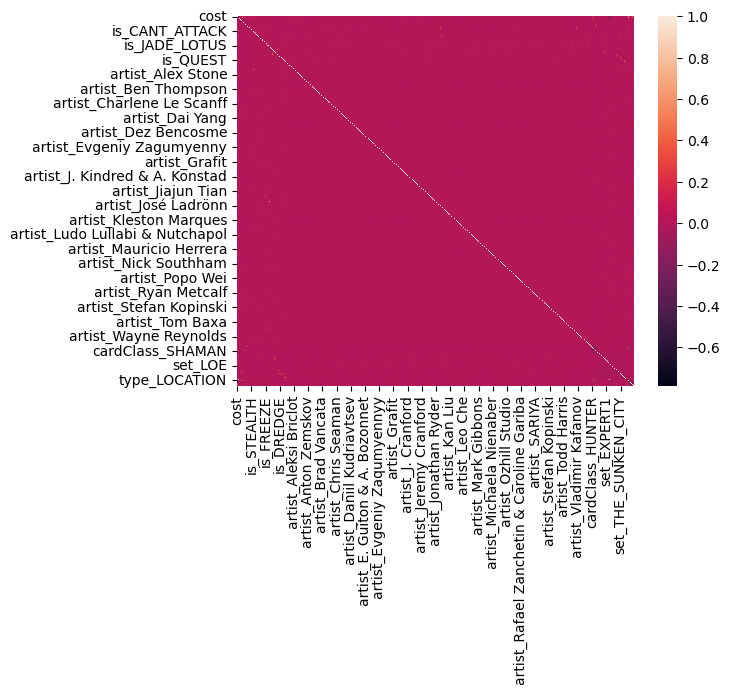

In [34]:
sns.heatmap(
    df_encoded.corr(),
)

In [43]:
matcorr=df_encoded.corr()

coorcol=matcorr[matcorr > 0.8]
coorcol=coorcol.stack().reset_index()
coorcol=coorcol[coorcol[0] < 1 ]

In [44]:
print(coorcol)

            level_0         level_1         0
3            health  set_HERO_SKINS  0.878510
4            health       type_HERO  0.927594
48    is_JADE_GOLEM   is_JADE_LOTUS  0.816357
49    is_JADE_LOTUS   is_JADE_GOLEM  0.816357
530  set_HERO_SKINS          health  0.878510
532  set_HERO_SKINS       type_HERO  0.947085
557       type_HERO          health  0.927594
558       type_HERO  set_HERO_SKINS  0.947085


In [45]:
correlation_pairs = (matcorr.stack()
                     .loc[lambda x: (x > 0.8) | (x < -0.8)]
                     .reset_index()
                     .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))

correlation_pairs['Sorted Features'] = correlation_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Sorted Features'])
correlation_pairs.drop(columns=['Sorted Features'], inplace=True)

In [76]:
trie_corr= correlation_pairs.loc[(correlation_pairs["Correlation"] > 0.8) & (correlation_pairs["Correlation"] != 1) & (correlation_pairs["Correlation"] < -0.8)] 

In [77]:
print(trie_corr)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [69]:
#On retire donc les features : set_HERO_SKINS , type_HERO et is_JADE_LOTUS
variable_retirer = ["set_HERO_SKINS" , "type_HERO","is_JADE_LOTUS"]
df_finie=df_encoded.drop(columns = variable_retirer)

In [71]:
df_finie

,cost,attack,health,is_SECRET,is_HEROPOWER_DAMAGE,is_RECEIVES_DOUBLE_SPELLDAMAGE_BONUS,is_INSPIRE,is_BATTLECRY,is_DEATHRATTLE,is_OVERHEAL,...,set_YEAR_OF_THE_DRAGON,type_LOCATION,type_MINION,type_SPELL,type_WEAPON,rarity_COMMON,rarity_EPIC,rarity_FREE,rarity_LEGENDARY,rarity_RARE
0,5.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,3.0,-1.0,-1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.0,3.0,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,-1.0,-1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5841,1.0,1.0,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5842,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5843,9.0,9.0,9.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [70]:
df_finie.to_csv("dataFrameFinal.csv",index=False)

In [87]:
target = ["rarity_COMMON","rarity_EPIC","rarity_FREE","rarity_LEGENDARY","rarity_RARE"]
quant = ["cost","attack","health"]
qual = [col for col in df_finie.columns  if col not in target + quant]
vartot = df_finie[quant+qual].values
y = df_finie["rarity_LEGENDARY"].values


In [99]:
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [159]:
df_cut=df_finie.drop(columns = target).copy()

In [163]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df_finie),50))
x_noies= np.hstack([df_cut,noise])

In [164]:
x_noies

array([[ 5.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         1.05712223e+00,  3.43618290e-01, -1.76304016e+00],
       [ 3.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         2.61055272e-01,  5.11345664e-03, -2.34587133e-01],
       [ 2.00000000e+00,  3.00000000e+00,  2.00000000e+00, ...,
        -1.32045661e+00,  5.21941566e-01,  2.96984673e-01],
       ...,
       [ 3.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         2.96627729e-01, -9.57403234e-01,  3.99155707e-01],
       [ 9.00000000e+00,  9.00000000e+00,  9.00000000e+00, ...,
         9.00542292e-01, -1.05801506e+00,  8.48206300e-02],
       [ 5.00000000e+00,  6.00000000e+00,  3.00000000e+00, ...,
        -2.84475915e-01,  9.79068450e-01, -5.30431595e-01]])

In [217]:
X_train, X_test, y_train, y_test = train_test_split(x_noies, y,random_state=0, test_size=0.5)
centile= 100
select = SelectPercentile(percentile=centile)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print('X_train shape : {}'.format(X_train.shape))
print('X_train_selected shape : {}'.format(X_train_selected.shape))

X_train shape : (2922, 601)
X_train_selected shape : (2922, 601)


/home/kali/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  5  51  69  70  74  86  88  89 107 117 125 127 130 131 138 143 146 148
 149 157 158 160 161 170 173 174 178 181 191 193 197 198 202 207 208 226
 241 243 244 245 249 262 267 269 274 281 282 283 284 287 288 293 295 297
 298 313 318 322 323 336 338 347 355 361 364 380 386 388 392 394 395 396
 397 399 408 424 452 460 467 486] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/kali/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [218]:
mask = select.get_support(1)
mask_corrige=mask[mask <551]
col_selected=df_cut.iloc[:,mask_corrige]
df_selected = pd.DataFrame(col_selected)


In [219]:
quant_sel=["cost","attack","health"]
qual_sel = [col for col in df_selected.columns  if col not in quant_sel]

X= df_selected[quant_sel + qual_sel]

In [209]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score

In [220]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size=0.3, stratify=y)
split_accuracy = []
split_precision = []
best_accuracy = 0
best_k = 0

print(f"centile : {centile}")
for t in range(1, 3, 1) : 
    print(f"================ p={t}")
    for i in range(1, 20, 1):
        
        knn = KNeighborsClassifier(n_neighbors=i, p=t)
        knn.fit(X_trainK, y_trainK)
        print(f"k={i}")
        prediction = knn.predict(X_testK)
        accuracy = accuracy_score(y_testK, prediction)
        print(f"Accuracy: {accuracy_score(y_testK, prediction)}")
        split_accuracy.append(accuracy_score(y_testK, prediction))
        split_precision.append(precision_score(y_testK, prediction))
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = i
            best_p=t
    
    print(f"Meilleur k avec la meilleure accuracy: k={best_k}, accuracy={best_accuracy}, p={best_p}" )

centile : 100
================ p=1
k=1
Accuracy: 0.8563283922462942
k=2
Accuracy: 0.8779931584948689
k=3
Accuracy: 0.8677309007981756
k=4
Accuracy: 0.8734321550741163
k=5
Accuracy: 0.8751425313568986
k=6
Accuracy: 0.8808437856328393
k=7
Accuracy: 0.8797035347776511
k=8
Accuracy: 0.8825541619156214
k=9
Accuracy: 0.8831242873432155
k=10
Accuracy: 0.8842645381984037
k=11
Accuracy: 0.879133409350057
k=12
Accuracy: 0.8882554161915621
k=13
Accuracy: 0.8808437856328393
k=14
Accuracy: 0.8808437856328393
k=15
Accuracy: 0.8814139110604333
k=16
Accuracy: 0.8819840364880274
k=17
Accuracy: 0.8814139110604333
k=18
Accuracy: 0.8797035347776511
k=19
Accuracy: 0.8836944127708096
Meilleur k avec la meilleure accuracy: k=12, accuracy=0.8882554161915621, p=1
================ p=2
k=1
Accuracy: 0.8517673888255416
k=2
Accuracy: 0.8745724059293044
k=3
Accuracy: 0.87115165336374
k=4
Accuracy: 0.8734321550741163
k=5
Accuracy: 0.8740022805017104
k=6
Accuracy: 0.878563283922463
k=7
Accuracy: 0.8762827822120867
k=

In [ ]:
# percentile 2.5 : K=8 , 0.8808437856328393
# percentile 5 : k=5 , 0.8854047890535918
# percentile 30 :  k=6, accuracy=0.8899657924743444
# percentile 50 :  k=19, accuracy=0.8882554161915621


# percentile 2.5 / manathan : k=17, accuracy=0.8808437856328393
# percentile 50 / manathan : k=13, accuracy=0.8774230330672748

#sans percentile : k=8, accuracy=0.8916761687571265 / distance euclidienne
#sans percentile : k=8, accuracy=0.8945267958950969 / dsitance de manathan


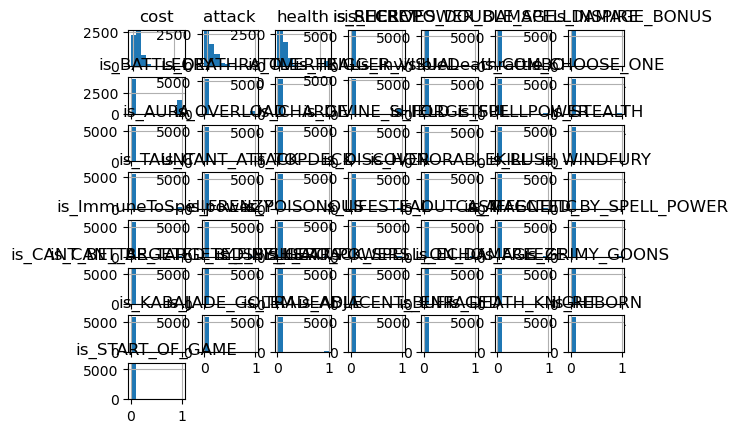

In [224]:
df_finie.iloc[:,:50].hist()
plt.show()